In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc("font", size=18, family="serif")
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.utilities.physical_ratios import cm_per_kpc, K_per_keV
from yt.units import mp
import pyxsim
import soxs
import aplpy


/home/aditiv/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aditiv/anaconda3/lib/python3.6/site-packages/yt/analysis_modules/cosmological_observation/api.py:22: VisibleDeprecationWarning: Development of the LightRay module has been moved to the Trident package. This version is deprecated and will be removed from yt in a future release. See https://github.com/trident-project/trident for further information.
  from .light_ray.api import \
/home/aditiv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(me

In [2]:
plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'

In [3]:
Msun = 2.e33
ks = 1.e3
area = (2000.0, "cm**2") # collecting area
dist=(1.0, "Mpc")
RA,dec = (349.60, -42.0) 
nH = 1.93e-2  #in units of 10^22 /cm/cm
Bins         = np.arange(0.0, 5., 1.e-3)
bins         = np.arange(0.0, 5., 0.13)
t02  = 0


In [4]:
base     = "/home/aditiv/CGM/Pyxsim/Data/"

# folder = "LR/"
# folder = "HR_0821_n1e-5_T1e6_SFR10_Rsf2kpc/"
# folder ="HR_0814_n1e-5_T1e6_hse_SFR3_Rsf8kpc/"


folder = "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/" #hdhsfr
# folder ="HR_0821_1e-6_SFR3/"                   #ldlsfr  

if(folder == "LR/"):
    filename = "DD0050/"
    file_loc = base + folder + filename 
    outfile  = folder
    ds       = yt.load(file_loc + "sb_0050")
    rho0     = 3.e-29
    t01      = 1.e7
    t02      = 0

elif(folder == "HR_0821_n1e-5_T1e6_SFR10_Rsf2kpc/"):
    filename = "DD0050/"
    file_loc = base + folder + filename 
    outfile  = folder
    ds       = yt.load(file_loc + "sb_0050")
    rho0     = 3.e-28
    t01      = 1.e6
    t02      = 1.e7
    
    
elif (folder == "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/"):
    filename = "DD0130/"
    file_loc = base + folder + filename 
    outfile  = folder
    ds       = yt.load(file_loc + "sb_0130")
#     t        = 50 * ks
    rho0     = 6.e-28
    t01      = 1.e6
    t02      = 1.8e6
    
elif (folder == "HR_0814_n1e-5_T1e6_hse_SFR3_Rsf8kpc/"):
    filename = "DD0130/"
    file_loc = base + folder + filename 
    outfile  = folder
    ds       = yt.load(file_loc + "sb_0130")
#     t        = 5 * ks
    rho0     = 2.e-27
    t01      = 1.e6
    t02      = 0
    
elif (folder == "HR_0821_1e-6_SFR3/"):
    filename = "DD0300/"
    file_loc = base + folder + filename 
    outfile  = folder + filename
    ds       = yt.load(file_loc + "sb_0300")
    
t        = 100 * ks    
exp_time = (t, "s") # exposure time
print(ds.field_list)

yt : [INFO     ] 2019-10-03 19:13:55,125 Parameters: current_time              = 1299.9999474465
yt : [INFO     ] 2019-10-03 19:13:55,126 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-03 19:13:55,126 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-10-03 19:13:55,127 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-10-03 19:13:55,127 Parameters: cosmological_simulation   = 0.0
Parsing Hierarchy : 100%|██████████| 881/881 [00:00<00:00, 26873.46it/s]
yt : [INFO     ] 2019-10-03 19:13:55,193 Gathering a field list (this may take a moment.)


[('enzo', 'Cooling_Time'), ('enzo', 'Density'), ('enzo', 'GasEnergy'), ('enzo', 'Metal_Density'), ('enzo', 'Temperature'), ('enzo', 'TotalEnergy'), ('enzo', 'x-velocity'), ('enzo', 'y-velocity'), ('enzo', 'z-velocity')]


In [5]:
sp        = ds.sphere('c',(50,'kpc'))
cr1       = sp.cut_region(" (obj['z'].in_units('kpc')<6) & (obj['z'].in_units('kpc')>-6)\
                   & (obj['radius'].in_units('kpc')<20)  " )

sim_cr    = sp - cr1

simmass   = sim_cr.quantities.total_quantity(["cell_mass"]).in_units('g')/Msun


print("Simulation mass=",sim_cr.quantities.total_quantity(["cell_mass"]).in_units('g')/Msun/1.e8)

Simulation mass= 69.1231289903726 g


In [6]:

(tlow, thigh) = (1.e5, 2.e7)
(dlow, dhigh) = (1.e-29, 1.e-25)
extrema     = dict(temperature=(tlow, thigh), density=(dlow, dhigh))

In [7]:
met_cutlt25 = sim_cr.cut_region(["obj['metallicity']<=0.25"])
met_cutlt50 = sim_cr.cut_region("(obj['metallicity']>0.25) & (obj['metallicity']<=0.5)")
met_cutlt10 = sim_cr.cut_region(["obj['metallicity']<=1.0"])

In [8]:
temp  = np.loadtxt(folder + filename + "temp_cellm.txt",usecols=0)
cellm = np.loadtxt(folder + filename + "temp_cellm.txt",usecols=1)

log_n  = "/home/aditiv/CGM/Pyxsim/Gaussian/"

templn  = np.loadtxt(log_n + folder + filename + "ln-t_cellm.txt",usecols=0)
cellmln = np.loadtxt(log_n + folder + filename + "ln-t_cellm.txt",usecols=1)


Sim_evtx  = np.loadtxt(folder + filename + "sim_spec_HR.txt",usecols=0)
Sim_evty  = np.loadtxt(folder + filename + "sim_spec_HR.txt",usecols=1)

sim_evtx  = np.loadtxt(folder + filename + "sim_spec_LR.txt",usecols=0)
sim_evty  = np.loadtxt(folder + filename + "sim_spec_LR.txt",usecols=1)
  
    
ln_evtx   = np.loadtxt(log_n + folder + filename + "ln_spec_LR.txt",usecols=0)
ln_evty   = np.loadtxt(log_n + folder + filename + "ln_spec_LR.txt",usecols=1)
    
    

In [9]:
simmass   = sim_cr.quantities.total_quantity(["cell_mass"]).in_units('g')/Msun
metmass25   = met_cutlt25.quantities.total_quantity(["cell_mass"]).in_units('g')/Msun
metmass50   = met_cutlt50.quantities.total_quantity(["cell_mass"]).in_units('g')/Msun
metmass10   = met_cutlt10.quantities.total_quantity(["cell_mass"]).in_units('g')/Msun
print(simmass/metmass25, simmass/metmass50, simmass/metmass10)

2.0328814053777995 dimensionless 5.0348828076540295 dimensionless 1.0593736494830286 dimensionless


In [10]:
profile = yt.create_profile(met_cutlt25,["temperature"],fields=["cell_mass"], \
                            n_bins=[128, 128], weight_field=None, \
                            accumulation=False, extrema = extrema)
temp_met25  = profile.x
cellm_met25 = profile["cell_mass"]


profile = yt.create_profile(met_cutlt50,["temperature"],fields=["cell_mass"], \
                            n_bins=[128, 128], weight_field=None,\
                            accumulation=False, extrema = extrema )
temp_met50  = profile.x
cellm_met50 = profile["cell_mass"]


profile = yt.create_profile(met_cutlt10,["temperature"],fields=["cell_mass"], \
                            n_bins=[128, 128], weight_field=None,\
                            accumulation=False, extrema = extrema)
temp_met10  = profile.x
cellm_met10 = profile["cell_mass"]




# np.savetxt(outfile + "temp_cellm.txt",np.column_stack([profile.x,profile["cell_mass"]]))

# profile = yt.create_profile(met_cr, ["density"],fields=["cell_mass"],\
#                             n_bins=[128, 128], weight_field=None, accumulation=False)
# np.savetxt(outfile + "dens_cellm.txt",np.column_stack([profile.x,profile["cell_mass"]]))



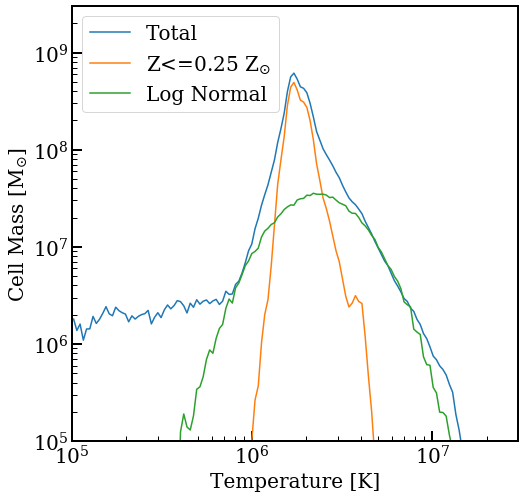

In [11]:
plt.figure(figsize=(8,8))
plt.plot(temp,cellm/Msun, label = 'Total')
plt.plot(temp_met25,cellm_met25/Msun, label=r'Z<=0.25 Z$_{\odot}$')
plt.plot(templn, cellmln/Msun, label = 'Log Normal')
# plt.plot(temp_met50,cellm_met50, label='Met>0.25 &<=0.50')
# plt.plot(temp_met10,cellm_met10, label='Met<=1.0')
plt.xlim(1.e5,3.e7)
plt.ylim(1.e5,3.e9)
plt.ylabel('Cell Mass [M$_{\odot}$]')
plt.xlabel('Temperature [K]')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.savefig(folder+ filename + "m-t_Z_sim.pdf")

In [12]:
#Code for Generating Spectrum From Metulation Data Comparing with relevant numbers for NGC7582

Zmet         = ("gas", "metallicity")
source_model = pyxsim.ThermalSourceModel("apec", 0.1, 5.0, 5000,Zmet=Zmet)


Photons      = pyxsim.PhotonList.from_data_source(met_cutlt25,0.0, area, exp_time, source_model, \
                                             dist=dist)
Events       = Photons.project_photons("x", (RA, dec), absorb_model="wabs", nH=nH)
Events1      = Photons.project_photons("x", (RA, dec))
energy = Events["eobs"]
Ega = np.asarray(energy)
Met_evty, Met_evtx   = np.histogram(Ega, bins=Bins)
met_evty, met_evtx   = np.histogram(Ega,bins)
np.savetxt(folder + filename + "met_spec_HR.txt",np.column_stack([Met_evtx[:-1],Met_evty/t]))
np.savetxt(folder + filename + "met_spec_LR.txt",np.column_stack([met_evtx[:-1],met_evty/t]))
print("EVENT LIST FOR SIMULATION BOX GENERATED!")
energy = Events1["eobs"]
Enoga = np.asarray(energy)
Met_evnty1, Met_evntx1 = np.histogram(Enoga,Bins)


print("SIMULATION BOX ANALYSED!")


soxs : [INFO     ] 2019-10-03 19:15:38,045 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-10-03 19:15:38,046 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-10-03 19:15:38,047 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-10-03 19:15:38,093 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-10-03 19:15:38,094 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-10-03 19:15:38,095 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 847425/850527 [00:29<00:00, 35464.88it/s]pyxsim : [INFO     ] 2019-10-03 19:16:14,936 Finished generating photons.
pyxsim : [INFO     ] 2019-10-03 19:16:14,938 Number of photons generated: 58858418
pyxsim : [INFO     ] 2019-10-03 19:16:14,939 Number of cells with photons: 850527
pyxsim : [INFO     ] 2019-10-03 19:16:15,039 Doppler-shifting photon energies.
Doppler shifting photons: 10

EVENT LIST FOR SIMULATION BOX GENERATED!
SIMULATION BOX ANALYSED!


In [13]:
#Code for Generating Spectrum From Metulation Data Comparing with relevant numbers for NGC7582

Zmet         = ("gas", "metallicity")
source_model = pyxsim.ThermalSourceModel("apec", 0.1, 5.0, 5000,Zmet=Zmet)


Photons      = pyxsim.PhotonList.from_data_source(met_cutlt50,0.0, area, exp_time, source_model, \
                                             dist=dist)
Events       = Photons.project_photons("x", (RA, dec), absorb_model="wabs", nH=nH)
Events1      = Photons.project_photons("x", (RA, dec))
energy = Events["eobs"]
Ega = np.asarray(energy)
Met50_evty, Met50_evtx   = np.histogram(Ega, bins=Bins)
met50_evty, met50_evtx   = np.histogram(Ega,bins)
np.savetxt(folder + filename + "met_spec_HR.txt",np.column_stack([Met_evtx[:-1],Met_evty/t]))
np.savetxt(folder + filename + "met50_spec_LR.txt",np.column_stack([met_evtx[:-1],met_evty/t]))
print("EVENT LIST FOR SIMULATION BOX GENERATED!")
energy = Events1["eobs"]
Enoga = np.asarray(energy)
Met_evnty1, Met_evntx1 = np.histogram(Enoga,Bins)


print("SIMULATION BOX ANALYSED!")


soxs : [INFO     ] 2019-10-03 19:17:32,740 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-10-03 19:17:32,742 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-10-03 19:17:32,742 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-10-03 19:17:32,807 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-10-03 19:17:32,809 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-10-03 19:17:32,810 Using temperature field '(gas, temperature)'.
Processing cells/particles :  99%|█████████▉| 280962/282846 [00:17<00:00, 22461.70it/s]pyxsim : [INFO     ] 2019-10-03 19:17:57,414 Finished generating photons.
pyxsim : [INFO     ] 2019-10-03 19:17:57,416 Number of photons generated: 28123297
pyxsim : [INFO     ] 2019-10-03 19:17:57,417 Number of cells with photons: 282833
pyxsim : [INFO     ] 2019-10-03 19:17:57,483 Doppler-shifting photon energies.
Doppler shifting photons: 10

EVENT LIST FOR SIMULATION BOX GENERATED!
SIMULATION BOX ANALYSED!


In [ ]:
f, ax = plt.subplots(3, 1, gridspec_kw = {'wspace':0.4, 'hspace':0.1,},\
                        figsize=(12, 18))
for i in range(3):
    ax[i].tick_params(direction='in', which='both')
    ax[i].tick_params(labelsize=18)
    ax[i].tick_params(size=10.0)
    ax[i].tick_params(size=5.0,which='minor')
    ax[i].tick_params(width=1.2)
    ax[i].tick_params(width=0.5,which='minor')
    ax[i].set_yscale('log')
    ax[i].set_ylabel(r'counts s$^{-1}$ keV$^{-1}$') 
    ax[i].plot(Sim_evtx,Sim_evty/Sim_evtx, ':',label='All Box')
    ax[i].plot(Met_evtx[:-1],Met_evty/Met_evtx[:-1]/t, ':',label='Metallicity Cut')
#     ax[i].plot(Sim_evtx,(Sim_evty+Met_evty/t)/Sim_evtx, '-',label='Sum')
   
ax[0].set_xlim(.1,2.0)
ax[1].set_xlim(.3,0.5)

ax[2].set_xlim(.7,0.8)
ax[2].set_xlabel('Energy(keV)')
ax[0].legend()
# plt.savefig(folder+ filename + "ub_galacabs.pdf")

/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


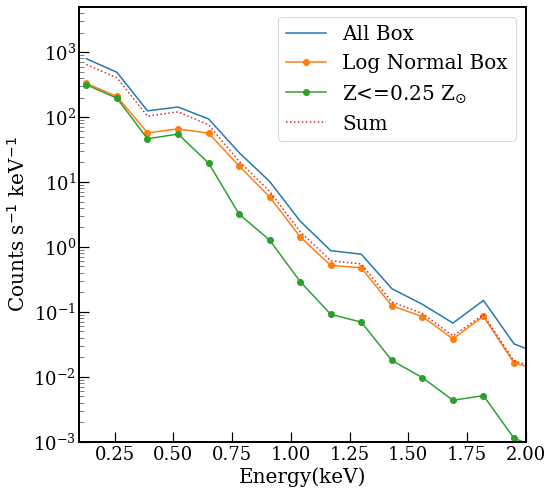

In [14]:
f, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.4, 'hspace':0.1,},\
                        figsize=(8, 8))



ax.tick_params(direction='in', which='both')
ax.tick_params(labelsize=18)
ax.tick_params(size=10.0)
ax.tick_params(size=5.0,which='minor')
ax.tick_params(width=1.2)
ax.tick_params(width=0.5,which='minor')
ax.set_yscale('log')
ax.set_ylabel(r'Counts s$^{-1}$ keV$^{-1}$') 
ax.plot(sim_evtx,sim_evty/sim_evtx, '-',label='All Box')
ax.plot(ln_evtx,ln_evty/ln_evtx, '-o',label='Log Normal Box')
ax.plot(met_evtx[:-1],met_evty/met_evtx[:-1]/t, '-o',label=r'Z<=0.25 Z$_{\odot}$')
ax.plot(sim_evtx,(ln_evty+met_evty/t)/sim_evtx, ':',label='Sum')
#     ax.plot(Sim_evtx,(Sim_evty+Met_evty/t)/Sim_evtx, '-',label='Sum')
   
ax.set_xlim(.1,2.0)
ax.set_ylim(1.e-3,5.e3)
ax.set_xlabel('Energy(keV)')
ax.legend()
plt.savefig(folder+ filename + "met_sim_LR.pdf")